# How to pick a name with big data?

Picking a name is a very personal thing. A name can honor past family members and friends. It can remind you of people you’ve met and their personalities. But, I’m going to take a very utilitarian approach.

First, what are we optimizing for? We could try to find a unique name by looking at [the distribution of names by starting letter](https://medium.com/@TimSwast/what-letters-most-commonly-start-first-names-ef5f7f8e50d2#.kzv4g7fho). We might choose a name beginning with the letter U based on that analysis.

But consider the situation where an elementary school teacher lines students up alphabetically. With a name beginning with U, the child would always be at the end. Personally, I find being at the end of a line uncomfortable. It’s much better to be near the center of a line. Let’s see if we can use data to optimize for comfort in this situation.

In [1]:
# Copyright 2017 Google Inc.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

from matplotlib import pyplot as plt
from pandas.io import gbq
import pandas as pd

First, use [BigQuery](https://cloud.google.com/bigquery/) to query the [USA Names public dataset](https://cloud.google.com/bigquery/public-data/usa-names). Summarize how many people have had each name.

In [2]:
q = '''#standardSQL
SELECT
  name,
  name_total,
  SUM(name_total) OVER(ORDER BY name ASC) AS name_cumulative
FROM (
  SELECT
    name,
    SUM(number) AS name_total
  FROM
    `bigquery-public-data.usa_names.usa_1910_2013`
  GROUP BY
    name )
ORDER BY
  name ASC'''
df = gbq.read_gbq(q, project_id='swast-scratch', dialect='standard')

Requesting query... ok.
Query running...
Query done.
Processed: 84.1 Mb

Retrieving results...
Got 29828 rows.

Total time taken 4.94 s.
Finished at 2017-03-03 03:03:58.


In [3]:
# Add a column that converts the cumulative total to percentages
total_names = df.name_cumulative.tail(1).values
df = df.assign(name_percent=pd.Series((df.name_cumulative * 100.0) / total_names).values)

In [4]:
def pareto(df, nletters):
    dff = df.groupby(by=lambda x: df.name[x][:nletters])
    dff = dff.agg({'name_total': 'sum', 'name_percent': 'max'})

    # Make a pareto plot (two y-axes)
    dff.name_total.plot.bar()
    return dff.name_percent.plot(secondary_y=True)

Next, build a [Pareto chart](https://en.wikipedia.org/wiki/Pareto_chart) of the distribution of names by starting letter.

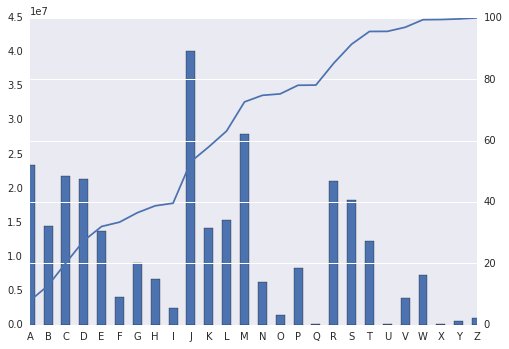

In [5]:
pareto(df, 1)

The bars show the relative distributions of names, and the line shows the cumulative total. For example, since the line is at 40 for the letter I, we know that 40% of people have names beginning with the letter A through I. We’re looking for where the line crosses 50%, because we want the name that puts us right in the middle of an alphabetized line of people.

We see that the line crosses 50% at the letter J, so let’s zoom in on that.

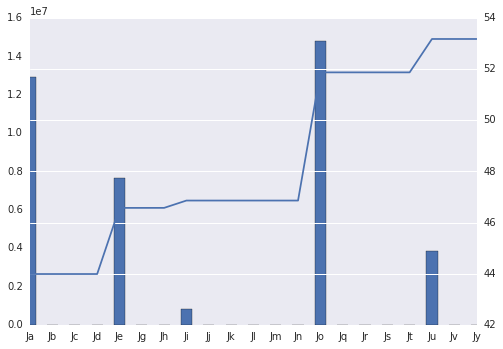

In [6]:
j = df.select(lambda x: df.name.values[x].startswith("J"))
pareto(j, 2)

Now the line crosses 50% at names beginning with Jo, so let’s zoom in again.

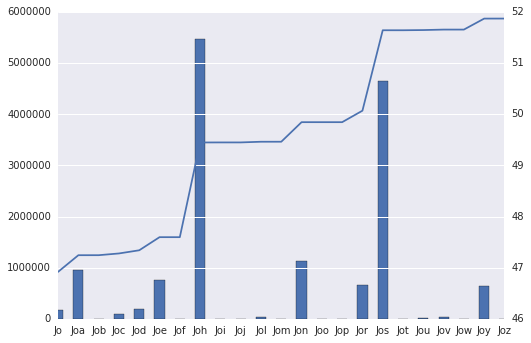

In [7]:
jo = df.select(lambda x: df.name.values[x].startswith("Jo"))
pareto(jo, 3)

The line crosses 50% at Jor. Looking at all the names beginning with Jor, we see that Jordan has a cumulative total of 50.002042%.

In [8]:
jor = df.select(lambda x: df.name.values[x].startswith("Jor"))
jor

,name,name_total,name_cumulative,name_percent
13702,Jordain,5,147402649,49.844152
13703,Jordan,466921,147869570,50.002042
13704,Jordana,1453,147871023,50.002533
13705,Jordann,125,147871148,50.002575
13706,Jordanna,30,147871178,50.002585
13707,Jordanne,49,147871227,50.002602
13708,Jordany,97,147871324,50.002635
13709,Jorden,4944,147876268,50.004307
13710,Jordi,1342,147877610,50.004760
13711,Jordin,3305,147880915,50.005878


 So, to optimize for comfort in an alphabetized line, we’ve found the perfectly unbiased name: Jordan.